In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
from tueplots import figsizes, fonts, axes, fontsizes, markers


In [2]:
# Color
PALETTE = "deep"
sns.set_palette(sns.color_palette(PALETTE))

# Figsize
plt.rcParams.update(figsizes.aistats2023_half(tight_layout=True,
                                              height_to_width_ratio=1))  # make square fig.

# Font
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
# Font size
plt.rcParams.update(fontsizes.aistats2023(default_smaller=0))
# Axes ===
plt.rcParams.update(axes.lines(base_width=1,  # base width for line params.
                               line_base_ratio=2))  # increase only linewidth
plt.rcParams.update(axes.grid(grid_alpha=0.5))  # custom grid. alpha=0-1, for transparency
# Markers
# plt.rcParams.update({"errorbar.capsize": 2})  # error bars capsize
# plt.rcParams.update(markers.with_edge())  # set markers with black edge


In [3]:
cmap = sns.color_palette()
ova_args = {"color": cmap[0],
            "marker": "o"}
softmax_args = {"color": cmap[1],
                "marker": "s"}
hemmer_args = {"color": cmap[2],
               "marker": "d"}
oneclf_args = {"color": cmap[3],
               "marker": "p"}
best_expert_args = {"color": cmap[4],
                    "marker": "X"}

marker_size = 4
cmap = sns.color_palette()
ova_args = {"color": cmap[0],
            "marker": "o",
            "markersize": marker_size,
            "linestyle": "-"}

softmax_args = {"color": cmap[1],
                "marker": "o",
                "markersize": marker_size,
                "linestyle": "--"}

hemmer_args = {"color": cmap[2],
               "marker": "o",
               "markersize": marker_size,
               "linestyle": "-."}

oneclf_args = {"color": cmap[3],
               "marker": "o",
               "markersize": marker_size,
               "linestyle": ":"}
best_expert_args = {"color": cmap[4],
                    "marker": "o",
                    "markersize": marker_size,
                    "linestyle":(0, (5, 1))}


In [4]:

exp_list = np.arange(1, 11)

# System Accuracy ===
softmax_sys_acc_mean = np.array([80.57617188, 80.53222656, 80.47851562, 83.18847656, 83.046875,
                                 82.890625, 85.20019531, 89.65332031, 90.03417969, 90.26855469])
softmax_sys_acc_std = np.array([0.14435298, 0.22250307, 0.2896541, 0.29180678, 0.33799151,
                                0.41721626, 0.187909, 0.36165789, 0.32985196, 0.0921934])

ova_sys_acc_mean = np.array([81.12792969, 81.06933594, 80.98632812, 84.43847656,
                             84.41894531, 84.12109375, 85.703125, 90.33203125, 91.0859375, 91.18410156])
ova_sys_acc_std = np.array([0.24535829, 0.12367114, 0.08293598, 0.22766686, 0.10224801,
                            0.10907377, 0.30538079, 0.12638847, 0.05960232, 0.05725605])

hemmer_sys_acc_mean = np.array([81.32324219, 81.31347656, 81.328125, 81.2109375, 82.02636719,
                                80.3515625, 85.21972656, 90.28320312, 90.28320312, 90.1949219])
hemmer_sys_acc_std = np.array([0.09296598, 0.07933631, 0.19491537, 0.52371436, 0.5194748,
                               0.24698055, 0.776797, 0., 0., 0.04907166])

oneclf_sys_ac_mean = np.array([80.6884765625] * 10)
oneclf_sys_acc_std = np.array([0.047591769261762513] * 10)

best_expert_sys_acc_mean = np.array([0.3350586, 0.39033204, 0.4868164, 0.7583984, 0.76240236,
                                     0.7614746, 0.81767577, 0.90283203, 0.90283203, 0.90283203]) * 100
best_expert_sys_acc_std = np.array([0.00236275, 0.00213312, 0.00400048, 0.00252966, 0.00064778,
                                    0.00283876, 0.0003654, 0., 0., 0.]) * 100

# ECE ===
softmax_ece_mean = np.array([0.04273834, 0.03418386, 0.03729755, 0.04281903, 0.05091158,
                             0.05377965, 0.05173227, 0.06434666, 0.04958877, 0.05057223]) * 100
softmax_ece_std = np.array([0.00405226, 0.00320963, 0.00514138, 0.00446022, 0.00536153,
                            0.00556824, 0.00450405, 0.00793056, 0.00380896, 0.00224725]) * 100

ova_ece_mean = np.array([0.0066247, 0.01004168, 0.00896093, 0.00890559, 0.01121967,
                         0.01427782, 0.01126991, 0.01441123, 0.01293591, 0.01385832]) * 100
ova_ece_std = np.array([0.0016119, 0.00194781, 0.00110613, 0.00127048, 0.00156236,
                        0.00226612, 0.0023544, 0.00142443, 0.00073736, 0.0005971]) * 100

hemmer_ece_mean = np.array([0.33229655, 0.3449123, 0.3693817, 0.39431214, 0.43933678,
                            0.48034725, 0.51677305, 0.54664063, 0.55589706, 0.59133637]) * 100
hemmer_ece_std = np.array([0.00295779, 0.00207966, 0.00294765, 0.00325574, 0.00365588,
                           0.00058772, 0.00251633, 0.00125597, 0.0010235, 0.00053293]) * 100


In [5]:
def addBreakClips(ax1,ax2, ax_ratio=1):
    """ Code to add diagonal slashes to truncated y-axes.
    copied from http://matplotlib.org/examples/pylab_examples/broken_axis.html"""
    
    d = .015 # how big to make the diagonal lines in axes coordinates
    
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d,+d),(-ax_ratio*d,+ax_ratio*d), **kwargs)      # top-left diagonal
    ax1.plot((1-d,1+d),(-ax_ratio*d,+ax_ratio*d), **kwargs)    # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
    ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal
    

# Plot

/export/usuarios01/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:148: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


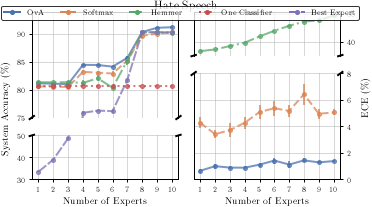

In [9]:
fig = plt.figure(figsize=(5,3))

ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), rowspan=2, colspan=1, fig=fig)
ax2 = plt.subplot2grid(shape=(3, 2), loc=(2, 0), rowspan=1, colspan=1, fig=fig)
 
ax3 = plt.subplot2grid(shape=(3, 2), loc=(0, 1), rowspan=1, colspan=1, fig=fig)
ax4 = plt.subplot2grid(shape=(3, 2), loc=(1, 1), rowspan=2, colspan=1, fig=fig)

# === Plots ===
# OvA
ax1.errorbar(exp_list, ova_sys_acc_mean, yerr=ova_sys_acc_std,
             alpha=0.75, **ova_args)
ax2.errorbar(exp_list, ova_sys_acc_mean, yerr=ova_sys_acc_std,
             alpha=0.75, **ova_args)
# Softmax
ax1.errorbar(exp_list, softmax_sys_acc_mean, yerr=softmax_sys_acc_std,
             alpha=0.75, **softmax_args)
ax2.errorbar(exp_list, softmax_sys_acc_mean, yerr=softmax_sys_acc_std,
             alpha=0.75, **softmax_args)

# Hemmer
ax1.errorbar(exp_list, hemmer_sys_acc_mean, yerr=hemmer_sys_acc_std,
             alpha=0.75, **hemmer_args)
ax2.errorbar(exp_list, hemmer_sys_acc_mean, yerr=hemmer_sys_acc_std,
             alpha=0.75, **hemmer_args)

# One Classifier
ax1.errorbar(exp_list, oneclf_sys_ac_mean, yerr=oneclf_sys_acc_std,
             alpha=0.75, **oneclf_args)
ax2.errorbar(exp_list, oneclf_sys_ac_mean, yerr=oneclf_sys_acc_std,
             alpha=0.75, **oneclf_args)

# Best Expert
ax1.errorbar(exp_list, best_expert_sys_acc_mean, yerr=best_expert_sys_acc_std,
             alpha=0.75, **best_expert_args)
ax2.errorbar(exp_list, best_expert_sys_acc_mean, yerr=best_expert_sys_acc_std,
             alpha=0.75, **best_expert_args)


# === remove the bottom border from the top plot and the upper border from the bottom plot ===
ax1.spines['bottom'].set_visible(False)
# === ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)

# === show only top x-axis tick marks on the top plot ===
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# === show only bottom x-axis tick marks on the lower plot ===
ax2.xaxis.tick_bottom()

# === ax1 lim ===
ax1.set_ylim(75, 94)
ax1.set_xticks(exp_list)
ax1.set_yticks(ax1.get_yticks()[:-1])

# === ax2 lim ===
ax2.set_ylim(30, 50)
ax2.set_xticks(exp_list)
ax2.set_xlabel(r"Number of Experts")

# === Grid ===
ax1.grid()
ax2.grid()

# === Broken axes ===
addBreakClips(ax1,ax2)

# ===============================================================================================================
# OvA
ax3.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)
ax4.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)

# Softmax
ax3.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)
# Softmax
ax4.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)

# Hemmer
ax3.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)
ax4.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)

# === remove the bottom border from the top plot and the upper border from the bottom plot ===
ax3.spines['bottom'].set_visible(False)
# === ax1.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)

# === show only top x-axis tick marks on the top plot ===
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# === show only bottom x-axis tick marks on the lower plot ===
ax4.xaxis.tick_bottom()

# === ax1 lim ===
ax3.set_ylim(30, 62)
ax3.set_xticks(exp_list)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
# ax3.set_yticks(ax1.get_yticks()[:-1])

# === ax2 lim ===
ax4.set_ylim(0, 8)
ax4.set_xticks(exp_list)
ax4.set_xlabel(r"Number of Experts")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
# === Grid ===
ax3.grid()
ax4.grid()

# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer', **hemmer_args)
oneclf_leg = mlines.Line2D([], [], label='One Classifier', **oneclf_args)
bestexpert_leg = mlines.Line2D([], [], label='Best Expert', **best_expert_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg, oneclf_leg, bestexpert_leg]

fig.legend(handles=legend_list, loc='center', bbox_to_anchor=(0.5, 0.9), ncol=5, fancybox=True)

# === Broken axes ===
addBreakClips(ax3,ax4)


plt.gcf().text(0,0.5, r"System Accuracy $(\%)$", ha="center", va="center", rotation=90)
plt.gcf().text(1,0.55, r"ECE $(\%)$", ha="center", va="center", rotation=90)

# # === Save ===
plt.suptitle("Hate Speech", x=0.5, y=1)

fig.tight_layout()
# fig.savefig("hatespeech.pdf")


# Plot without Best Expert outlier

/Users/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:114: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


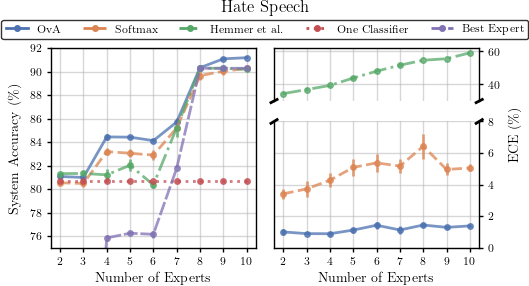

In [73]:
exp_list = np.arange(2, 11)


fig = plt.figure(figsize=(5,3))

ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), rowspan=3, colspan=1, fig=fig) 
ax3 = plt.subplot2grid(shape=(3, 2), loc=(0, 1), rowspan=1, colspan=1, fig=fig)
ax4 = plt.subplot2grid(shape=(3, 2), loc=(1, 1), rowspan=2, colspan=1, fig=fig)

# === Plots ===
# OvA
ax1.errorbar(exp_list, ova_sys_acc_mean[1:], yerr=ova_sys_acc_std[1:],
             alpha=0.75, **ova_args)
# Softmax
ax1.errorbar(exp_list, softmax_sys_acc_mean[1:], yerr=softmax_sys_acc_std[1:],
             alpha=0.75, **softmax_args)

# Hemmer
ax1.errorbar(exp_list, hemmer_sys_acc_mean[1:], yerr=hemmer_sys_acc_std[1:],
             alpha=0.75, **hemmer_args)

# One Classifier
ax1.errorbar(exp_list, oneclf_sys_ac_mean[1:], yerr=oneclf_sys_acc_std[1:],
             alpha=0.75, **oneclf_args)

# Best Expert
ax1.errorbar(exp_list, best_expert_sys_acc_mean[1:], yerr=best_expert_sys_acc_std[1:],
             alpha=0.75, **best_expert_args)

# === ax1 lim ===
ax1.set_ylim(75, 92)
ax1.set_xticks(exp_list, exp_list)
ax1.set_yticks(ax1.get_yticks()[1:])
ax1.set_xlabel(r"Number of Experts")

# === Grid ===
ax1.grid()


# ===============================================================================================================
# OvA
ax3.errorbar(exp_list, ova_ece_mean[1:], yerr=ova_ece_std[1:],
                alpha=0.75, label="OvA", **ova_args)
ax4.errorbar(exp_list, ova_ece_mean[1:], yerr=ova_ece_std[1:],
                alpha=0.75, label="OvA", **ova_args)

# Softmax
ax3.errorbar(exp_list, softmax_ece_mean[1:], yerr=softmax_ece_std[1:],
                alpha=0.75, label="Softmax", **softmax_args)
# Softmax
ax4.errorbar(exp_list, softmax_ece_mean[1:], yerr=softmax_ece_std[1:],
                alpha=0.75, label="Softmax", **softmax_args)

# Hemmer
ax3.errorbar(exp_list, hemmer_ece_mean[1:], yerr=hemmer_ece_std[1:],
                alpha=0.75, label="Softmax", **hemmer_args)
ax4.errorbar(exp_list, hemmer_ece_mean[1:], yerr=hemmer_ece_std[1:],
                alpha=0.75, label="Softmax", **hemmer_args)

# === remove the bottom border from the top plot and the upper border from the bottom plot ===
ax3.spines['bottom'].set_visible(False)
# === ax1.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)

# === show only top x-axis tick marks on the top plot ===
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# === show only bottom x-axis tick marks on the lower plot ===
ax4.xaxis.tick_bottom()

# === ax1 lim ===
ax3.set_ylim(30, 62)
ax3.set_xticks(exp_list, exp_list)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
# ax3.set_yticks(ax1.get_yticks()[:-1])

# === ax2 lim ===
ax4.set_ylim(0, 8)
ax4.set_xticks(exp_list, exp_list)
ax4.set_xlabel(r"Number of Experts")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
# === Grid ===
ax3.grid()
ax4.grid()

# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer et al.', **hemmer_args)
oneclf_leg = mlines.Line2D([], [], label='One Classifier', **oneclf_args)
bestexpert_leg = mlines.Line2D([], [], label='Best Expert', **best_expert_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg, oneclf_leg, bestexpert_leg]

fig.legend(handles=legend_list, loc='center', bbox_to_anchor=(0.5, 0.90), ncol=5, fancybox=True)

# === Broken axes ===
addBreakClips(ax3,ax4, ax_ratio=2)


plt.gcf().text(0,0.5, r"System Accuracy $(\%)$", ha="center", va="center", rotation=90)
plt.gcf().text(1,0.55, r"ECE $(\%)$", ha="center", va="center", rotation=90)

# # === Save ===
plt.suptitle("Hate Speech", x=0.5, y=0.97, ha="center", va="center")

fig.tight_layout()
fig.savefig("hatespeech.pdf")


# System Accuracy

/Users/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


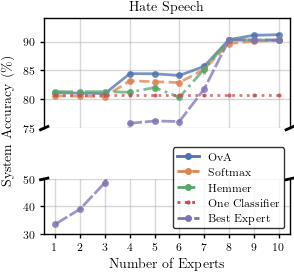

In [11]:
# fig,(ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(2.5, 2.5), gridspec_kw={'height_ratios': [4, 1]})
fig,(ax1,ax2) = plt.subplots(2, 1, figsize=(3, 3), gridspec_kw={'height_ratios': [2, 1]})

# === Plots ===
# OvA
ax1.errorbar(exp_list, ova_sys_acc_mean, yerr=ova_sys_acc_std,
             alpha=0.75, **ova_args)
ax2.errorbar(exp_list, ova_sys_acc_mean, yerr=ova_sys_acc_std,
             alpha=0.75, **ova_args)
# Softmax
ax1.errorbar(exp_list, softmax_sys_acc_mean, yerr=softmax_sys_acc_std,
             alpha=0.75, **softmax_args)
ax2.errorbar(exp_list, softmax_sys_acc_mean, yerr=softmax_sys_acc_std,
             alpha=0.75, **softmax_args)

# Hemmer
ax1.errorbar(exp_list, hemmer_sys_acc_mean, yerr=hemmer_sys_acc_std,
             alpha=0.75, **hemmer_args)
ax2.errorbar(exp_list, hemmer_sys_acc_mean, yerr=hemmer_sys_acc_std,
             alpha=0.75, **hemmer_args)

# One Classifier
ax1.errorbar(exp_list, oneclf_sys_ac_mean, yerr=oneclf_sys_acc_std,
             alpha=0.75, **oneclf_args)
ax2.errorbar(exp_list, oneclf_sys_ac_mean, yerr=oneclf_sys_acc_std,
             alpha=0.75, **oneclf_args)

# Best Expert
ax1.errorbar(exp_list, best_expert_sys_acc_mean, yerr=best_expert_sys_acc_std,
             alpha=0.75, **best_expert_args)
ax2.errorbar(exp_list, best_expert_sys_acc_mean, yerr=best_expert_sys_acc_std,
             alpha=0.75, **best_expert_args)


# === remove the bottom border from the top plot and the upper border from the bottom plot ===
ax1.spines['bottom'].set_visible(False)
# === ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)

# === show only top x-axis tick marks on the top plot ===
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# === show only bottom x-axis tick marks on the lower plot ===
ax2.xaxis.tick_bottom()

# === squeeze plots closer ===
plt.subplots_adjust(hspace=0.5) #set to zero, if you want to join the two plots

# === ax1 lim ===
ax1.set_ylim(75, 94)
ax1.set_yticks(ax1.get_yticks()[:-1])

# === ax2 lim ===
ax2.set_ylim(30, 50)
ax2.set_xticks(exp_list, exp_list)
ax2.set_xlabel(r"Number of Experts")

# === Grid ===
ax1.grid()
ax2.grid()

# === Broken axes ===
addBreakClips(ax1,ax2)

# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer', **hemmer_args)
oneclf_leg = mlines.Line2D([], [], label='One Classifier', **oneclf_args)
bestexpert_leg = mlines.Line2D([], [], label='Best Expert', **best_expert_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg, oneclf_leg, bestexpert_leg]
ax2.legend(handles=legend_list, loc="lower right")
#ax2.legend(handles=legend_list, bbox_to_anchor=(1.1, 1.05), markerscale=0.7)

# == y label ===
fig.text(0, 0.55, r"System Accuracy $(\%)$", ha='center', va='center', rotation='vertical')
ax1.set_title("Hate Speech")

# # === Save ===
fig.set_tight_layout(True)
fig.savefig("hatespeech_sys_acc.pdf")


# ECE

/Users/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


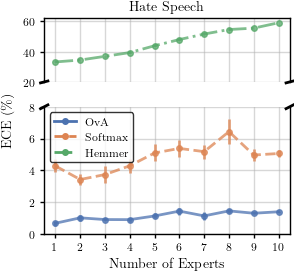

In [12]:
# f_ece, ax_ece = plt.subplots(1, 1, figsize=(2.5, 2.5))
fig,(ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(3, 3), gridspec_kw={'height_ratios': [1, 2]})

# OvA
ax1.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)
ax2.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)

# Softmax
ax1.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)
# Softmax
ax2.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)

# Hemmer
ax1.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)
ax2.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)

# === remove the bottom border from the top plot and the upper border from the bottom plot ===
ax1.spines['bottom'].set_visible(False)
# === ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)

# === show only top x-axis tick marks on the top plot ===
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# === show only bottom x-axis tick marks on the lower plot ===
ax2.xaxis.tick_bottom()

# === squeeze plots closer ===
plt.subplots_adjust(hspace=0.5) #set to zero, if you want to join the two plots

# === ax1 lim ===
ax1.set_ylim(30, 62)
ax1.set_yticks(ax1.get_yticks()[:-1])

# === ax2 lim ===
ax2.set_ylim(0, 8)
ax2.set_xticks(exp_list, exp_list)
ax2.set_xlabel(r"Number of Experts")

# === Grid ===
ax1.grid()
ax2.grid()

# === Broken axes ===
addBreakClips(ax1,ax2)


# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer', **hemmer_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg]
ax2.legend(handles=legend_list, loc="best")

# == y label ===
fig.text(0, 0.55, r"ECE $(\%)$", ha='center', va='center', rotation='vertical')
ax1.set_title("Hate Speech")

# === Save ===
fig.set_tight_layout(True)
fig.savefig("hatespeech_ece.pdf")
plt.show()


In [ ]:
from scipy import stats
import numpy as np

In [ ]:
a =np.random.randn(2,5)

In [ ]:
a =np.array([[2,2,2,2,2],[2,4,2,5,6]])
print(a.shape)

In [ ]:
a.std(axis=0)

In [ ]:
stats.sem(a, axis=0)